In [1]:
using DynamicalSystems, Plots

## Build dynamical system

In [132]:
function IPF_n(g,p,t)
    N=length(p)

    k=complex(zeros(N))
    k[2:end]=g[1:end-1]

    arg=g[1]/p[1]
    
    for i=2:N
        arg=arg-(p[i]/p[1]*exp(g[1]-g[i]))  
    end
        
    k[1]=g[1]-log(complex(arg))
                       
    return SVector{N, ComplexF64}(k)
end    

IPF_n (generic function with 1 method)

In [412]:
#initial values
g₀= [1.,1.,1.]
p= [0.6,0.2,0.1]

IPF_map = DiscreteDynamicalSystem(IPF_n, complex(g₀),p)

3-dimensional DeterministicIteratedMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  IPF_n
 parameters:    [0.6, 0.2, 0.1]
 time:          0
 state:         ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im]


### Time series

In [187]:
step!(IPF_map)
current_state(IPF_map)

3-element SVector{3, ComplexF64} with indices SOneTo(3):
 0.9000000023340617 + 0.0im
 0.9000001742838136 + 0.0im
 0.9000000881861803 + 0.0im

In [295]:
reinit!(IPF_map)
set_parameters!(IPF_map,[0.35,0.3,0.01]) #change α

In [381]:
step!(IPF_map)
current_state(IPF_map)

3-element SVector{3, ComplexF64} with indices SOneTo(3):
   1.322292763022546 + 0.0im
 0.25830063641842416 + 0.0im
  1.0665662410644285 + 0.0im

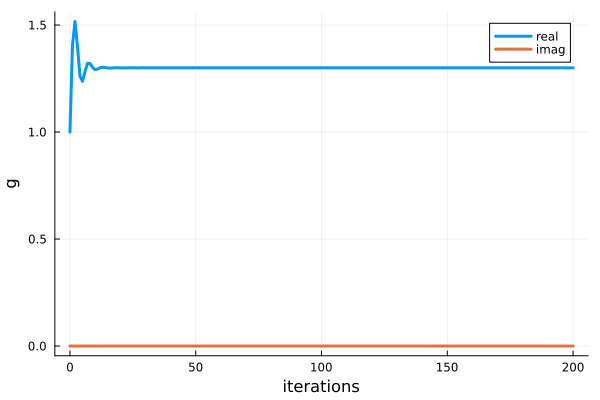

In [415]:
reinit!(IPF_map)
set_parameters!(IPF_map,[0.9,0.3,0.1]) #change α


X, t = trajectory(IPF_map, 200)

plot(t,real.(X[:,1]), label="real", legend=:topright, xlabel="iterations", ylabel="g", lw=3)
plot!(t,imag.(X[:,1]), label="imag", lw=3)

## Orbit diagram

In [408]:
values = range(0.2, 1, length=400) #Values for α

g0= [1.0, .1, 1.] # Specify an initial state
n= 50 # Amount of points to save for each parameter value
Ttr= 500 # Each orbit is evolved for Ttr first before saving output

i=1
parameter=1


p= [0.6,0.1,0.1]
IPF_map = DiscreteDynamicalSystem(IPF_n, complex(g₀),p)

orbit = orbitdiagram(IPF_map, 1, 1, values; n, Ttr, u0=g0, show_progress=true);

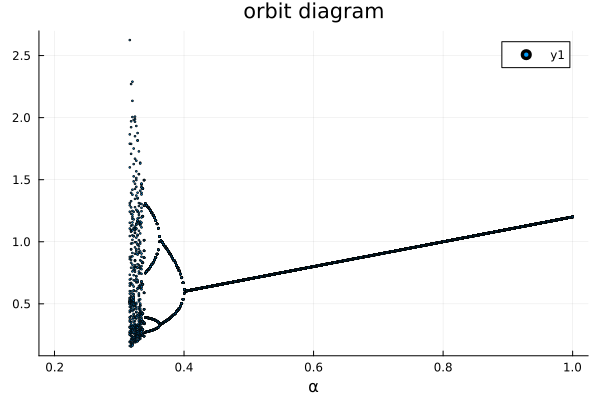

In [409]:
L = length(values)
x = Vector{Float64}(undef, n * L)
y = complex(copy(x))
for j in 1:L
    x[(1+(j-1)*n):j*n] .= values[j]
    y[(1+(j-1)*n):j*n] .= orbit[j]
end

y[imag(y).!=0].=NaN

scatter(real(x),real(y), ms=1, xlabel="α", title="orbit diagram")